In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
leader_position=np.array((20.0,50.0))
follower_position=np.zeros((3,2))
follower_position[0,:]=np.array((6,60))
follower_position[1,:]=np.array((10,40))
follower_position[2,:]=np.array((16,70))


leader_velocity=np.array((6.0,0))
follower_velocity=np.zeros((3,2))
follower_velocity[0,:]=np.array((10,5))
follower_velocity[1,:]=np.array((8,4))
follower_velocity[2,:]=np.array((9,3))

velocity_L=leader_velocity[:]
alpha=np.zeros((3,3))
flag_connect_0_other=1

if flag_connect_0_other!=1:
    alpha[0,:]=np.array((0,0,0))
    alpha[1,:]=np.array((0,0,10))
    alpha[2,:]=np.array((0,10,0))
else:
    alpha[0,:]=np.array((0,1,1))
    alpha[1,:]=np.array((1,0,1))
    alpha[2,:]=np.array((1,1,0))

k=np.array((0,1,1))

beta=1
gamma=1

r_leader=np.array((-15,-10,-5))
r_ij=np.zeros((3,3,2))
r_ij[0,:,0]=np.array((0,-5,-10))
r_ij[0,:,1]=np.zeros((3,1)).reshape(3)
r_ij[1,:,0]=np.array((5,0,-5))
r_ij[1,:,1]=np.zeros((3,1)).reshape(3)
r_ij[2,:,0]=np.array((10,5,0))
r_ij[2,:,1]=np.zeros((3,1)).reshape(3)
r=np.zeros((3,2))
r[0,:]=np.array((-15,0))
r[1,:]=np.array((-10,0))
r[2,:]=np.array((-5,0))

T=10
rounds=1000
delta_t=T/rounds
position_map=np.zeros((rounds,4,2))
velocity_map=np.zeros((rounds,4,2))

In [7]:
for t in range(rounds):
    position_map[t,0,:]=leader_position[:]
    position_map[t,1,:]=follower_position[0,:]
    position_map[t,2,:]=follower_position[1,:]
    position_map[t,3,:]=follower_position[2,:]
    velocity_map[t,0,:]=leader_velocity[:]
    velocity_map[t,1,:]=follower_velocity[0,:]
    velocity_map[t,2,:]=follower_velocity[1,:]
    velocity_map[t,3,:]=follower_velocity[2,:]
    leader_position[:]+=leader_velocity[:]*delta_t
    for i in range(3):
        sum_tmp=np.zeros((3,2))
        for j in range(3):
            sum_tmp[i,:]+=alpha[i,j]*(follower_position[i,:]-follower_position[j,:]-r_ij[i,j,:])+beta*(follower_velocity[i,:]-follower_velocity[j,:])
        sum_tmp[i,:]+=k[i]*(follower_position[i,:]-leader_position[:]-r[i,:]+gamma*(follower_velocity[i,:]-leader_velocity[:]))
        follower_velocity[i,:]-=sum_tmp[i,:]*delta_t
        follower_position[i,:]+=follower_velocity[i,:]*delta_t

AttributeError: 'AxesSubplot' object has no attribute 'canvas'

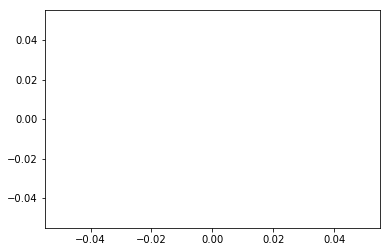

In [17]:
import matplotlib.animation as animation

def init():
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    return line_L

def update(frame):
    xlist_L.append(position_map[frame,0,0])
    ylist_L.append(position_map[frame,0,1])
    line_L.set_data(xlist,ylist_L)
    
ax=plt.subplot()
fig.ax=fig
xlist_L,ylist_L=[],[]
line_L=plt.plot([],[],'-',c='r',animated=True)
ani=animation.FuncAnimation(ax,update,frame=np.linspace(0,rounds,10),init_func=init,blit=True)

plt.show()

In [29]:
c_list = ["blue", "black", "red"]

for i, c in zip(range(3), c_list):
    plt.plot([j[:, i,0] for j in position_map[:,i,:]], [j[:, i,1] for j in position_map[:,i,:]], c=c)
    plt.annotate('', xy=(position_map[:, i][-1]), xytext=(position_map[:, i][-1] - velocity_map[:, i][-1]),
                 arrowprops=dict(connectionstyle="arc3", facecolor=c))
plt.plot([i[0] for i in xL_list], [i[1] for i in xL_list], c="purple")
plt.annotate('', xy=(leader_position[-1]),xytext=(leader_position[-1] - leader_velocity[-1]),
             arrowprops=dict(connectionstyle="arc3", facecolor="purple"))
plt.xlabel("X Position(m)")
plt.ylabel("Y Position(m)")
plt.legend(["Vehicle i", "Vehicle i+1", "Vehicle i+2", "Leader"])
plt.title("fig.4" )
#plt.savefig("fig.4.jpg" )
plt.show()

IndexError: too many indices for array